## Loading MNIST dataset in Keras
The Keras deep learning library provides a convenience method for loading the MNIST dataset.

The dataset is downloaded automatically the first time this function is called and is stored in your home directory in ~/.keras/datasets/mnist.pkl.gz as a 15MB file.

This is very handy for developing and testing deep learning models.


In [1]:
%matplotlib notebook
from keras.datasets import mnist
import matplotlib.pyplot as plt

C:\Users\Shubham\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

<IPython.core.display.Javascript object>


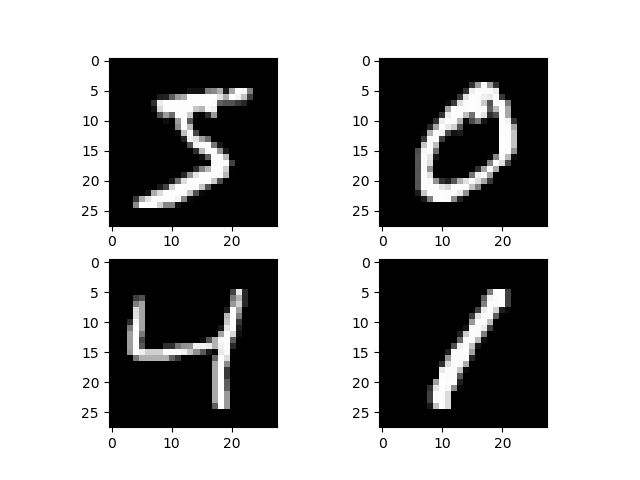

In [3]:
plt.figure()
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.show()

In [2]:
# importing the important libraries
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [3]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

## Baseline Model with Multi-Layer Perceptron

We can get very good results using a very simple neural network model with a single hidden layer. In this section we will create a simple multi-layer perceptron model that achieves an error rate of 1.74%. We will use this as a baseline for comparing more complex convolutional neural network models.

In [20]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [21]:
# flatten 28*28 image to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float')

In [22]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255 # the value of gray scale image is between 0-255
X_test = X_test/ 255

Finally, the output variable is an integer from 0 to 9. This is a multi-class classification problem. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix.

We can easily do this using the built-in np_utils.to_categorical() helper function in Keras.

In [23]:
# one hot ecode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [24]:
# define baseline model
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [25]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.2786 - acc: 0.9210 - val_loss: 0.1416 - val_acc: 0.9570
Epoch 2/10
 - 7s - loss: 0.1118 - acc: 0.9675 - val_loss: 0.0919 - val_acc: 0.9708
Epoch 3/10
 - 7s - loss: 0.0719 - acc: 0.9796 - val_loss: 0.0780 - val_acc: 0.9774
Epoch 4/10
 - 7s - loss: 0.0504 - acc: 0.9857 - val_loss: 0.0750 - val_acc: 0.9764
Epoch 5/10
 - 7s - loss: 0.0373 - acc: 0.9894 - val_loss: 0.0672 - val_acc: 0.9786
Epoch 6/10
 - 7s - loss: 0.0269 - acc: 0.9928 - val_loss: 0.0635 - val_acc: 0.9802
Epoch 7/10
 - 7s - loss: 0.0208 - acc: 0.9947 - val_loss: 0.0620 - val_acc: 0.9808
Epoch 8/10
 - 7s - loss: 0.0140 - acc: 0.9969 - val_loss: 0.0617 - val_acc: 0.9809
Epoch 9/10
 - 7s - loss: 0.0105 - acc: 0.9980 - val_loss: 0.0579 - val_acc: 0.9815
Epoch 10/10
 - 7s - loss: 0.0080 - acc: 0.9984 - val_loss: 0.0594 - val_acc: 0.9821
Baseline Error: 1.79%


## Convolutional Neural Networks for MNIST

In [5]:
from keras import backend as k
k.set_image_dim_ordering('th')

In [6]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [7]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

## Simple Convolutional Neural Network

In [8]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [9]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)
# Final evalutation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 157s 3ms/step - loss: 0.2441 - acc: 0.9310 - val_loss: 0.0786 - val_acc: 0.9757
Epoch 2/10
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0741 - acc: 0.9782 - val_loss: 0.0513 - val_acc: 0.9825
Epoch 3/10
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0533 - acc: 0.9838 - val_loss: 0.0409 - val_acc: 0.9854
Epoch 4/10
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0409 - acc: 0.9871 - val_loss: 0.0411 - val_acc: 0.9867
Epoch 5/10
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0334 - acc: 0.9898 - val_loss: 0.0362 - val_acc: 0.9885
Epoch 6/10
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0286 - acc: 0.9911 - val_loss: 0.0341 - val_acc: 0.9880
Epoch 7/10
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0243 - acc: 0.9918 - val_loss: 0.0394 - 

## Larger Convolutional Neural Network

In [6]:
# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % format(100-scores[1]*100))